# Import liabraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\admin\AppData\Local\Temp\ipykernel_9976\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Dataframe

In [5]:
df_cleaned=pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\cleaned_data.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_9976\2495574475.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned=pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\cleaned_data.csv")


In [6]:
df_cleaned

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,0.770771,0.662663,0.980734,0.414307,Samsung Galaxy A5 Sm-A520F,0.355933,0.000433,0.000702,...,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846
1,1,13114483482878900224,0.235235,0.606607,0.733164,0.414353,Samsung Galaxy J5 (Sm-J530),0.358701,0.000671,0.000702,...,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401
2,2,13114483484080500736,0.001001,0.652653,0.731360,0.414194,Samsung Galaxy A8 (2018),0.353501,0.001115,NaN,...,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394
3,3,13114483485442799616,0.486486,0.171171,0.709627,0.414303,undefined,0.354263,0.001115,NaN,...,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439
4,4,13114483499480700928,0.565566,0.954955,0.584100,0.414303,Samsung Sm-G390F,0.354774,0.001115,NaN,...,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149995,13042425979329300480,0.615616,0.407407,0.028315,0.414303,undefined,0.354019,0.003229,0.001264,...,0.281630,0.817879,0.966026,0.324810,0.930041,0.768458,0.381035,0.899247,0.674205,0.906287
149425,149996,7277825670196679680,0.451451,0.214214,0.040000,0.414382,Apple iPhone 8 Plus (A1897),0.355547,0.000330,0.000000,...,0.696143,0.534408,0.768887,0.893976,0.624357,0.555426,0.003867,0.814514,0.725666,0.632983
149426,149997,7349883264234609664,0.483483,0.187187,0.049038,0.414353,Apple iPhone Se (A1723),0.357346,0.000279,0.000281,...,0.596636,0.376532,0.831935,0.967345,0.743255,0.285950,0.844373,0.148418,0.480600,0.736207
149427,149998,13114483573367300096,0.283283,0.810811,0.049189,0.414333,Apple iPhone Xs (A2097),0.357962,0.000444,0.000843,...,0.974264,0.084309,0.428386,0.230136,0.656285,0.808894,0.143576,0.683303,0.424642,0.653758


# Task 2 - User Engagement Analysis


In [7]:
# Step 1: Calculate Session Duration in seconds
df_cleaned['Dur. (ms)'] = df_cleaned['Dur. (ms)'] / 1000  # Convert milliseconds to seconds

# Step 2: Aggregate metrics on a per-user basis
user_engagement_metrics = df_cleaned.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',                # Total Session Duration in seconds
    'Total UL (Bytes)': 'sum',         # Total Upload Data Volume
    'Total DL (Bytes)': 'sum',         # Total Download Data Volume
    'Social Media DL (Bytes)': 'sum',  # Data Volume for Social Media Download
    'Social Media UL (Bytes)': 'sum',  # Data Volume for Social Media Upload
    'Google DL (Bytes)': 'sum',        # Data Volume for Google Download
    'Google UL (Bytes)': 'sum',        # Data Volume for Google Upload
    'Email DL (Bytes)': 'sum',         # Data Volume for Email Download
    'Email UL (Bytes)': 'sum',         # Data Volume for Email Upload
    # Add more app-specific columns as needed
}).reset_index()

# Step 3: Calculate additional engagement metrics
user_engagement_metrics['Total Data Volume (Bytes)'] = (
    user_engagement_metrics['Total UL (Bytes)'] + user_engagement_metrics['Total DL (Bytes)']
)

# Step 4: Rename columns for clarity
user_engagement_metrics.columns = [
    'MSISDN/Number', 'Total Session Duration (s)', 'Total UL (Bytes)', 'Total DL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)', 'Total Data Volume (Bytes)'
]

# Step 5: Display or use the user_engagement_metrics DataFrame
(user_engagement_metrics)


,MSISDN/Number,Total Session Duration (s),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Total Data Volume (Bytes)
0,A-Link Telecom I. Cubot A5,0.000003,0.535873,0.697549,0.566303,0.896265,0.221570,0.885414,0.379175,0.762784,1.233423
1,A-Link Telecom I. Cubot Note Plus,0.000006,0.616360,0.917868,0.523284,0.721482,0.302748,0.052421,0.333082,0.429183,1.534227
2,A-Link Telecom I. Cubot Note S,0.000024,0.533622,0.899006,0.547560,0.154015,0.931414,0.537092,0.388999,0.194541,1.432628
3,A-Link Telecom I. Cubot Nova,0.000013,0.477611,0.231361,0.127569,0.798649,0.581717,0.594689,0.862905,0.874959,0.708972
4,A-Link Telecom I. Cubot Power,0.000002,0.195782,0.109256,0.792435,0.503355,0.488790,0.056098,0.479136,0.102370,0.305039
...,...,...,...,...,...,...,...,...,...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,0.000085,0.838332,0.794935,1.384966,1.137954,0.999674,1.144849,1.152875,1.333222,1.633266
1392,Zyxel Communicat. Lte7460,0.000043,0.305029,0.721342,0.105119,0.679353,0.350431,0.704394,0.298121,0.516762,1.026371
1393,Zyxel Communicat. Sbg3600,0.000043,0.889444,0.644697,0.900770,0.617094,0.563288,0.234810,0.576868,0.182689,1.534141
1394,Zyxel Communicat. Zyxel Wah7706,0.000043,0.371050,0.079084,0.394313,0.285896,0.854837,0.427235,0.322335,0.057756,0.450135


In [8]:
# step 6: Define weights for different engagement metrics
weights = {
    'Total Session Duration (s)': 0.3,
    'Total Data Volume (Bytes)': 0.5,
    'Social Media DL (Bytes)': 0.1,
    'Social Media UL (Bytes)': 0.1,
    'Google DL (Bytes)': 0.1,
    'Google UL (Bytes)': 0.1,
    'Email DL (Bytes)': 0.1,
    'Email UL (Bytes)': 0.1,
    # Add weights for other metrics as needed
}

# Step 7: Calculate the overall engagement score
user_engagement_metrics['Overall Engagement Score'] = (
    user_engagement_metrics[weights.keys()] * pd.Series(weights)
).sum(axis=1)

# Step 8: Display or use the user_engagement_metrics DataFrame with the overall engagement score
(user_engagement_metrics[['MSISDN/Number', 'Overall Engagement Score']])

,MSISDN/Number,Overall Engagement Score
0,A-Link Telecom I. Cubot A5,0.987863
1,A-Link Telecom I. Cubot Note Plus,1.003335
2,A-Link Telecom I. Cubot Note S,0.991683
3,A-Link Telecom I. Cubot Nova,0.738539
4,A-Link Telecom I. Cubot Power,0.394738
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,1.532013
1392,Zyxel Communicat. Lte7460,0.778617
1393,Zyxel Communicat. Sbg3600,1.074635
1394,Zyxel Communicat. Zyxel Wah7706,0.459317


In [9]:
import pandas as pd

# Assuming your DataFrame is named df_cleaned
# Replace df with the actual variable name if different

# Selecting application-specific columns
app_columns = df_cleaned[['Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                  'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
                  'Total UL (Bytes)', 'Total DL (Bytes)']]

# Performing some basic analysis or operations
# For example, calculating the total data usage for each application
app_columns['Total YouTube'] = app_columns['Youtube DL (Bytes)'] + app_columns['Youtube UL (Bytes)']
app_columns['Total Netflix'] = app_columns['Netflix DL (Bytes)'] + app_columns['Netflix UL (Bytes)']
app_columns['Total Gaming'] = app_columns['Gaming DL (Bytes)'] + app_columns['Gaming UL (Bytes)']
app_columns['Total Other'] = app_columns['Other DL (Bytes)'] + app_columns['Other UL (Bytes)']

# Displaying the results
(app_columns.head())


C:\Users\admin\AppData\Local\Temp\ipykernel_9976\1347970951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_columns['Total YouTube'] = app_columns['Youtube DL (Bytes)'] + app_columns['Youtube UL (Bytes)']
C:\Users\admin\AppData\Local\Temp\ipykernel_9976\1347970951.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_columns['Total Netflix'] = app_columns['Netflix DL (Bytes)'] + app_columns['Netflix UL (Bytes)']
C:\Users\admin\AppData\Local\Temp\ipykernel_9976\1347970951.py:15: SettingWithCopyWa

,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total YouTube,Total Netflix,Total Gaming,Total Other
0,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846,0.795282,0.791183,1.195953,0.735924
1,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401,1.738757,1.571063,0.792441,1.533897
2,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394,1.515881,1.036167,0.296086,0.741509
3,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439,1.607667,0.651560,1.603170,1.660910
4,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361,1.517540,0.755111,0.838823,1.492983


In [10]:
def calculate_session_frequency(df_cleaned):
    # Count the number of sessions for each user
    session_count = df_cleaned.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
    session_count.columns = ['MSISDN/Number', 'Session Count']
    return session_count

# Assuming df_sessions is the DataFrame you provided
result = calculate_session_frequency(df_cleaned)

# Display the result
(result)

,MSISDN/Number,Session Count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2
1392,Zyxel Communicat. Lte7460,1
1393,Zyxel Communicat. Sbg3600,1
1394,Zyxel Communicat. Zyxel Wah7706,1


In [11]:
def calculate_session_metrics(df_cleaned):
    # Convert 'Dur. (ms)' to seconds for easier interpretation
    df_cleaned['Duration (s)'] = df_cleaned['Dur. (ms)'] / 1000

    # Calculate session count and total duration for each user
    session_metrics = df_cleaned.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Duration (s)': 'sum'}).reset_index()
    session_metrics.columns = ['MSISDN/Number', 'Session Count', 'Total Duration (s)']

    return session_metrics

# Assuming df_sessions is the DataFrame you provided
result = calculate_session_metrics(df_cleaned)

# Display the result
(result)


,MSISDN/Number,Session Count,Total Duration (s)
0,A-Link Telecom I. Cubot A5,1,2.656849e-09
1,A-Link Telecom I. Cubot Note Plus,1,5.832002e-09
2,A-Link Telecom I. Cubot Note S,1,2.358122e-08
3,A-Link Telecom I. Cubot Nova,1,1.253486e-08
4,A-Link Telecom I. Cubot Power,1,2.079156e-09
...,...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,2,8.480375e-08
1392,Zyxel Communicat. Lte7460,1,4.279087e-08
1393,Zyxel Communicat. Sbg3600,1,4.264834e-08
1394,Zyxel Communicat. Zyxel Wah7706,1,4.279087e-08


In [12]:
def calculate_session_traffic(df_cleaned):
    # Calculate total traffic for each session (download + upload)
    df_cleaned['Total Traffic (Bytes)'] = df_cleaned['Total UL (Bytes)'] + df_cleaned['Total DL (Bytes)']

    # Create a DataFrame with 'MSISDN/Number' and 'Total Traffic (Bytes)'
    session_traffic = df_cleaned[['MSISDN/Number', 'Total Traffic (Bytes)']]

    return session_traffic

# Assuming df_sessions is the DataFrame you provided
result = calculate_session_traffic(df_cleaned)

# Display the result
(result)


,MSISDN/Number,Total Traffic (Bytes)
0,Samsung Galaxy A5 Sm-A520F,0.785837
1,Samsung Galaxy J5 (Sm-J530),1.396335
2,Samsung Galaxy A8 (2018),0.635898
3,undefined,1.472551
4,Samsung Sm-G390F,1.100112
...,...,...
149424,undefined,1.580492
149425,Apple iPhone 8 Plus (A1897),1.358649
149426,Apple iPhone Se (A1723),1.216806
149427,Apple iPhone Xs (A2097),1.078399


In [13]:
def calculate_session_duration(df_cleaned):
    # Calculate total session duration for each customer
    df_cleaned['Total Session Duration (s)'] = (df_cleaned['Dur. (ms)'] / 1000).groupby(df_cleaned['MSISDN/Number']).transform('sum')
    return df_cleaned[['MSISDN/Number', 'Total Session Duration (s)']].drop_duplicates()

# Call the function to calculate session duration
result_df = calculate_session_duration(df_cleaned)

# Display the result DataFrame
(result_df)

,MSISDN/Number,Total Session Duration (s)
0,Samsung Galaxy A5 Sm-A520F,2.450331e-04
1,Samsung Galaxy J5 (Sm-J530),3.227070e-04
2,Samsung Galaxy A8 (2018),1.898213e-04
3,undefined,5.822149e-04
4,Samsung Sm-G390F,4.696821e-05
...,...,...
147325,Lg-K520,4.279087e-08
147784,D-Link Corporati. Dwr-953,4.279141e-08
148427,Asustek Asus Zb500Kg,3.527384e-08
148640,Huawei Mediapad T5 10 Pro,4.079216e-08


In [14]:
# Function to calculate session frequency
def calculate_session_frequency(df_cleaned):
    # Count the number of sessions for each user
    session_count = df_cleaned.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
    session_count.columns = ['MSISDN/Number', 'Session Frequency']
    return session_count

# Call the function to calculate session duration
result_df = calculate_session_frequency(df_cleaned)


In [15]:
# Function to calculate total session duration
def calculate_session_duration(df_cleaned):
    # Calculate total session duration for each customer
    df_cleaned['Total Session Duration (s)'] = (df_cleaned['Dur. (ms)'] / 1000).groupby(df_cleaned['MSISDN/Number']).transform('sum')
    return df_cleaned[['MSISDN/Number', 'Total Session Duration (s)']].drop_duplicates()

# Call the function to calculate session duration
result_df = calculate_session_duration(df_cleaned)


In [16]:
# Function to calculate total traffic
def calculate_total_traffic(df_cleaned):
    # Calculate total traffic for each customer
    df_cleaned['Total Traffic (Bytes)'] = (df_cleaned['Total UL (Bytes)'] + df_cleaned['Total DL (Bytes)']).groupby(df_cleaned['MSISDN/Number']).transform('sum')
    return df_cleaned[['MSISDN/Number', 'Total Traffic (Bytes)']].drop_duplicates()

# Call the function to calculate session duration
result_df = calculate_total_traffic(df_cleaned)

In [17]:
# Call the functions to calculate metrics
frequency_df = calculate_session_frequency(df_cleaned)
duration_df = calculate_session_duration(df_cleaned)
traffic_df = calculate_total_traffic(df_cleaned)

# Merge the metrics into a single DataFrame
merged_df = pd.merge(frequency_df, duration_df, on='MSISDN/Number')
merged_df = pd.merge(merged_df, traffic_df, on='MSISDN/Number')

# Aggregate metrics per customer
aggregated_df = merged_df.groupby('MSISDN/Number').agg({
    'Total Traffic (Bytes)': 'sum',
    'Total Session Duration (s)': 'sum',
    'Session Frequency': 'max'
}).reset_index()

# Report the top 10 customers per engagement metric
top_10_traffic = aggregated_df.sort_values(by='Total Traffic (Bytes)', ascending=False).head(10)
top_10_duration = aggregated_df.sort_values(by='Total Session Duration (s)', ascending=False).head(10)
top_10_frequency = aggregated_df.sort_values(by='Session Frequency', ascending=False).head(10)

# Display the results
print("Top 10 customers by Total Traffic:")
(top_10_traffic)

print("\nTop 10 customers by Total Session Duration:")
(top_10_duration)

print("\nTop 10 customers by Session Frequency:")
(top_10_frequency)


Top 10 customers by Total Traffic:

Top 10 customers by Total Session Duration:

Top 10 customers by Session Frequency:


,MSISDN/Number,Total Traffic (Bytes),Total Session Duration (s),Session Frequency
316,Huawei B528S-23A,19895.678760,0.000916,19752
53,Apple iPhone 6S (A1688),9501.458066,0.000501,9419
49,Apple iPhone 6 (A1586),9091.684169,0.000421,9023
1395,undefined,9097.031894,0.000582,8987
59,Apple iPhone 7 (A1778),6377.749559,0.000287,6326
73,Apple iPhone Se (A1723),5189.439500,0.000272,5187
66,Apple iPhone 8 (A1905),5046.731738,0.000249,4993
78,Apple iPhone Xr (A2105),4595.414588,0.000255,4568
955,Samsung Galaxy S8 (Sm-G950F),4548.297770,0.000260,4520
75,Apple iPhone X (A1901),3827.215058,0.000186,3813


In [18]:
def aggregate_and_report_top_customers(df_cleaned):
    # Aggregate metrics per customer (MSISDN)
    aggregated_df = df_cleaned.groupby('MSISDN/Number').agg({
        'Dur. (ms)': 'sum',
        'Total UL (Bytes)': 'sum',
        'Total DL (Bytes)': 'sum',
        'Youtube DL (Bytes)': 'sum',
        'Netflix DL (Bytes)': 'sum',
        'Gaming DL (Bytes)': 'sum',
        'Other DL (Bytes)': 'sum',
    }).reset_index()

    # Calculate engagement metrics (e.g., total data usage, total duration)
    aggregated_df['Total Data Usage (Bytes)'] = aggregated_df['Total UL (Bytes)'] + aggregated_df['Total DL (Bytes)']
    aggregated_df['Total Duration (ms)'] = aggregated_df['Dur. (ms)']

    # Report the top 10 customers per engagement metric
    top_10_data_usage = aggregated_df.sort_values(by='Total Data Usage (Bytes)', ascending=False).head(10)
    top_10_duration = aggregated_df.sort_values(by='Total Duration (ms)', ascending=False).head(10)

    return top_10_data_usage, top_10_duration

# Example usage
top_10_data_usage, top_10_duration = aggregate_and_report_top_customers(df_cleaned)

# Display the results
print("Top 10 Customers by Total Data Usage:")
(top_10_data_usage)

print("\nTop 10 Customers by Total Duration:")
(top_10_duration)


Top 10 Customers by Total Data Usage:

Top 10 Customers by Total Duration:


,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total Data Usage (Bytes),Total Duration (ms)
316,Huawei B528S-23A,0.915885,10028.337440,9867.341320,9900.958590,9843.194504,9883.923019,9958.758453,19895.678760,0.915885
1395,undefined,0.582215,4558.961456,4538.070438,4504.284424,4476.805822,4548.582252,4452.896084,9097.031894,0.582215
53,Apple iPhone 6S (A1688),0.501305,4782.595481,4718.862585,4777.405885,4725.798708,4725.086701,4633.346530,9501.458066,0.501305
49,Apple iPhone 6 (A1586),0.421116,4574.943310,4516.740859,4522.463980,4492.703917,4524.025223,4524.210675,9091.684169,0.421116
888,Samsung Galaxy J5 (Sm-J530),0.322707,1872.056077,1824.501834,1868.000039,1842.345220,1826.117758,1842.506377,3696.557910,0.322707
59,Apple iPhone 7 (A1778),0.286681,3214.483346,3163.266212,3189.234648,3180.296394,3167.882799,3169.954955,6377.749559,0.286681
73,Apple iPhone Se (A1723),0.271732,2604.788822,2584.650677,2593.440163,2606.977511,2588.161982,2622.006377,5189.439500,0.271732
955,Samsung Galaxy S8 (Sm-G950F),0.259720,2286.175206,2262.122564,2282.811927,2256.790025,2265.552891,2264.437097,4548.297770,0.259720
78,Apple iPhone Xr (A2105),0.254666,2324.175814,2271.238773,2267.683506,2305.752758,2274.163969,2235.015475,4595.414588,0.254666
66,Apple iPhone 8 (A1905),0.249202,2530.633906,2516.097832,2495.405291,2461.324004,2522.787174,2527.772682,5046.731738,0.249202


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [20]:
# Select engagement metrics for clustering
engagement_metrics = ['Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)']

In [21]:
# Extract the selected metrics
X = df_cleaned[engagement_metrics]
X

,Total UL (Bytes),Total DL (Bytes),Dur. (ms)
0,0.448991,0.336846,0.000981
1,0.674934,0.721401,0.000733
2,0.331504,0.304394,0.000731
3,0.536111,0.936439,0.000710
4,0.472752,0.627361,0.000584
...,...,...,...
149424,0.674205,0.906287,0.000028
149425,0.725666,0.632983,0.000040
149426,0.480600,0.736207,0.000049
149427,0.424642,0.653758,0.000049


In [22]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Normalize the engagement metrics
X_normalized = scaler.fit_transform(X)

In [24]:
# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)


KMeans(n_clusters=3, random_state=42)

In [25]:
# Add cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans.labels_

In [26]:
# Display the resulting DataFrame with cluster labels
(df_cleaned.head())

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster
0,0,13114483460844900352,0.770771,0.662663,0.000981,0.414307,Samsung Galaxy A5 Sm-A520F,0.355933,0.000433,0.000702,...,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846,9.807342e-07,3732.549575,0.000245,1
1,1,13114483482878900224,0.235235,0.606607,0.000733,0.414353,Samsung Galaxy J5 (Sm-J530),0.358701,0.000671,0.000702,...,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401,7.331640e-07,3696.557910,0.000323,0
2,2,13114483484080500736,0.001001,0.652653,0.000731,0.414194,Samsung Galaxy A8 (2018),0.353501,0.001115,NaN,...,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394,7.313597e-07,2610.365711,0.000190,1
3,3,13114483485442799616,0.486486,0.171171,0.000710,0.414303,undefined,0.354263,0.001115,NaN,...,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439,7.096271e-07,9097.031894,0.000582,2
4,4,13114483499480700928,0.565566,0.954955,0.000584,0.414303,Samsung Sm-G390F,0.354774,0.001115,NaN,...,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361,5.841003e-07,570.500780,0.000047,2


In [27]:
# Compute non-normalized metrics for each cluster
cluster_metrics = df_cleaned.groupby('Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])

# Display the computed metrics
(cluster_metrics)


Total UL (Bytes)                                   Total DL (Bytes)  \
                     min       max      mean           sum              min   
Cluster                                                                       
0               0.467156  1.000000  0.636313  24862.642322         0.367516   
1               0.031933  0.987530  0.502427  34753.871781         0.000000   
2               0.000000  0.572562  0.391664  16130.288111         0.409817   

                                              Dur. (ms)                      \
              max      mean           sum           min       max      mean   
Cluster                                                                       
0        0.994451  0.689440  26938.484621  6.262843e-08  0.000733  0.000053   
1        0.498893  0.246770  17069.567437  2.537531e-08  0.001000  0.000053   
2        1.000000  0.744002  30640.962316  0.000000e+00  0.001000  0.000053   

                   
              sum  
Cluster            
0        2.052316  
1        3.646279  
2        2.176612

### Total UL (Bytes):

Minimum: Cluster 0 has a minimum value of 0.467156, Cluster 1 has 0.031933, and Cluster 2 has 0.000000.

Maximum: Cluster 0 has a maximum value of 1.000000, Cluster 1 has 0.987530, and Cluster 2 has 0.572562.

Mean: Cluster 0 has the highest mean (0.636313), followed by Cluster 1 (0.502427), and Cluster 2 (0.391664).

Sum: Cluster 0 has the highest total sum (24862.642322), followed by Cluster 1 (34753.871781), and Cluster 2 (16130.288111).

### Total DL (Bytes):

Minimum: Cluster 0 has a minimum value of 0.367516, Cluster 1 has 0.000000, and Cluster 2 has 0.409817.

Maximum: Cluster 0 has a maximum value of 0.994451, Cluster 1 has 0.498893, and Cluster 2 has 1.000000.

Mean: Cluster 0 has the highest mean (0.689440), followed by Cluster 1 (0.246770), and Cluster 2 (0.744002).

Sum: Cluster 0 has the highest total sum (26938.484621), followed by Cluster 1 (17069.567437), and Cluster 2 (30640.962316).

### Duration (ms):

Minimum: Cluster 0 has a minimum value of 6.262843e-08, Cluster 1 has 2.537531e-08, and Cluster 2 has 0.000000e+00.

Maximum: All clusters have similar maximum values.

Mean: Cluster 1 has the highest mean (0.000053), followed by Cluster 0 (0.000053), and Cluster 2 (0.000053).

Sum: Cluster 1 has the highest total sum (3.646279), followed by Cluster 0 (2.052316), and Cluster 2 (2.176612).

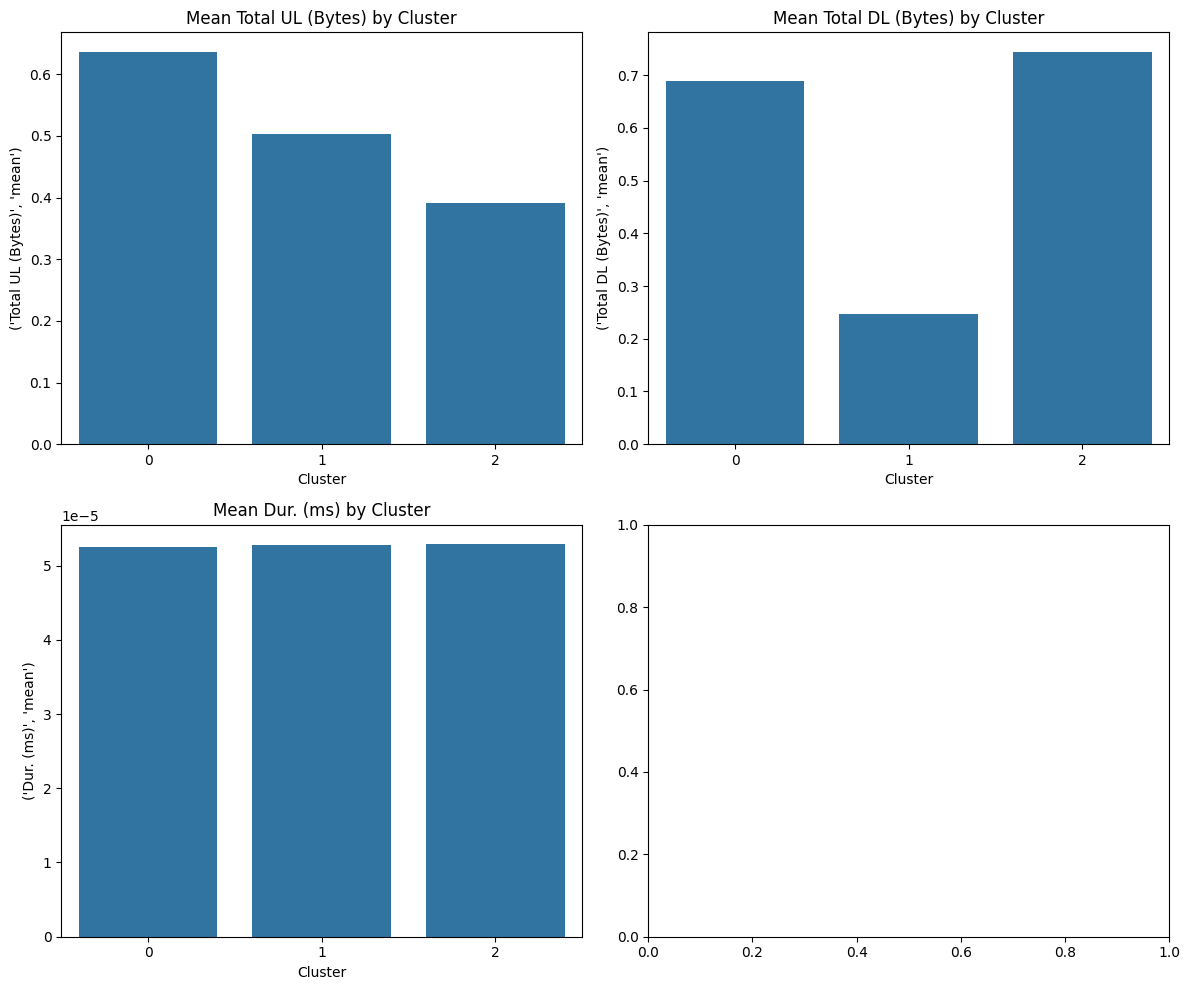

In [28]:
# Visualize the cluster metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, metric in enumerate(engagement_metrics):
    sns.barplot(x=cluster_metrics.index, y=(metric, 'mean'), data=cluster_metrics, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Mean {metric} by Cluster')

plt.tight_layout()
plt.show()

In [29]:
# Select relevant columns for application and traffic
app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
traffic_columns = [f'{app} DL (Bytes)' for app in app_columns] + [f'{app} UL (Bytes)' for app in app_columns]

# Extract application and traffic columns
app_traffic_df = df_cleaned[['MSISDN/Number'] + traffic_columns].copy()

# Melt the DataFrame to have a separate row for each (MSISDN/Number, Application) pair
app_traffic_df = app_traffic_df.melt(id_vars=['MSISDN/Number'], var_name='Application', value_name='Traffic_Bytes')

# Aggregate user total traffic per application
user_app_traffic = app_traffic_df.groupby(['MSISDN/Number', 'Application'])['Traffic_Bytes'].sum().reset_index()

# Rank users based on total traffic within each application
user_app_traffic['Rank'] = user_app_traffic.groupby('Application')['Traffic_Bytes'].rank(ascending=False, method='max')

# Get the top 10 users per application
top_10_users_per_app = user_app_traffic[user_app_traffic['Rank'] <= 10]

# Display the result
(top_10_users_per_app)



,MSISDN/Number,Application,Traffic_Bytes,Rank
686,Apple iPhone 6 (A1586),Email DL (Bytes),4503.047159,3.0
687,Apple iPhone 6 (A1586),Email UL (Bytes),4504.501631,4.0
688,Apple iPhone 6 (A1586),Gaming DL (Bytes),4524.025223,4.0
689,Apple iPhone 6 (A1586),Gaming UL (Bytes),4493.130745,4.0
690,Apple iPhone 6 (A1586),Google DL (Bytes),4584.573617,3.0
...,...,...,...,...
19539,undefined,Other UL (Bytes),4472.388940,4.0
19540,undefined,Social Media DL (Bytes),4486.051271,4.0
19541,undefined,Social Media UL (Bytes),4502.361819,3.0
19542,undefined,Youtube DL (Bytes),4504.284424,4.0


In [30]:
# Group by application and sum the total traffic
top_apps = top_10_users_per_app.groupby('Application')['Traffic_Bytes'].sum().reset_index()
top_apps


,Application,Traffic_Bytes
0,Email DL (Bytes),38277.164648
1,Email UL (Bytes),38360.771070
2,Gaming DL (Bytes),38399.899586
3,Gaming UL (Bytes),38342.116485
4,Google DL (Bytes),38472.224402
5,Google UL (Bytes),38099.289757
6,Netflix DL (Bytes),38244.982343
7,Netflix UL (Bytes),38292.348324
8,Other DL (Bytes),38308.755552
9,Other UL (Bytes),38239.740175


In [31]:
# Sort by total traffic in descending order
top_apps = top_apps.sort_values(by='Traffic_Bytes', ascending=False)
top_apps


,Application,Traffic_Bytes
4,Google DL (Bytes),38472.224402
12,Youtube DL (Bytes),38430.228633
2,Gaming DL (Bytes),38399.899586
1,Email UL (Bytes),38360.771070
3,Gaming UL (Bytes),38342.116485
13,Youtube UL (Bytes),38336.558430
10,Social Media DL (Bytes),38335.873082
8,Other DL (Bytes),38308.755552
7,Netflix UL (Bytes),38292.348324
11,Social Media UL (Bytes),38282.864460


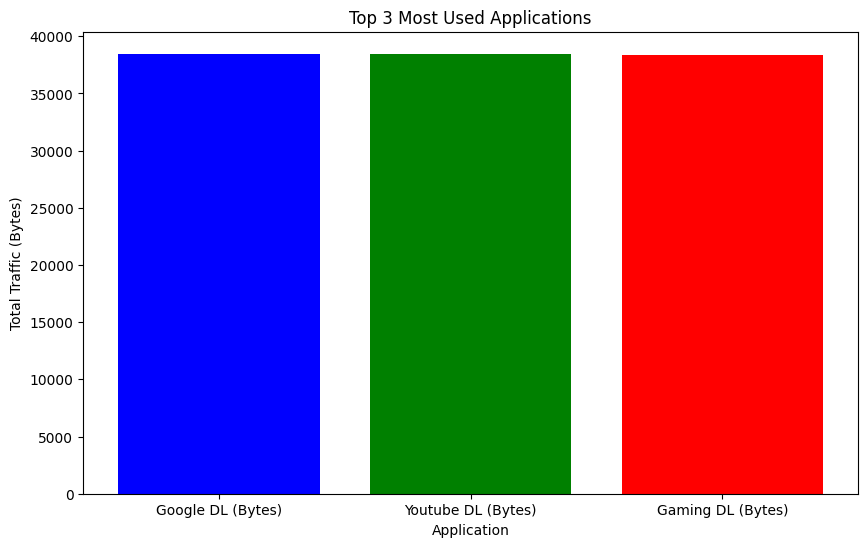

In [32]:
# Plotting using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_apps['Application'].head(3), top_apps['Traffic_Bytes'].head(3), color=['blue', 'green', 'red'])
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()



In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# Select relevant engagement metrics
engagement_metrics = df_cleaned[['Total Session Duration (s)', 'Total Traffic (Bytes)']]
engagement_metrics

,Total Session Duration (s),Total Traffic (Bytes)
0,0.000245,3732.549575
1,0.000323,3696.557910
2,0.000190,2610.365711
3,0.000582,9097.031894
4,0.000047,570.500780
...,...,...
149424,0.000582,9097.031894
149425,0.000160,3029.267320
149426,0.000272,5189.439500
149427,0.000069,1324.904830


In [35]:
# Standardize the data
scaler = StandardScaler()
scaled_engagement_metrics = scaler.fit_transform(engagement_metrics)


In [36]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_engagement_metrics)
    wcss.append(kmeans.inertia_)

In [37]:
# Based on the Elbow method, choose the optimal k (number of clusters)
optimal_k = 3

In [38]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_cleaned['Engagement Cluster'] = kmeans.fit_predict(scaled_engagement_metrics)


In [39]:
# Display the resulting DataFrame with the 'Engagement Cluster' column
(df_cleaned[['MSISDN/Number', 'Engagement Cluster']])

,MSISDN/Number,Engagement Cluster
0,Samsung Galaxy A5 Sm-A520F,2
1,Samsung Galaxy J5 (Sm-J530),0
2,Samsung Galaxy A8 (2018),2
3,undefined,0
4,Samsung Sm-G390F,2
...,...,...
149424,undefined,0
149425,Apple iPhone 8 Plus (A1897),2
149426,Apple iPhone Se (A1723),0
149427,Apple iPhone Xs (A2097),2


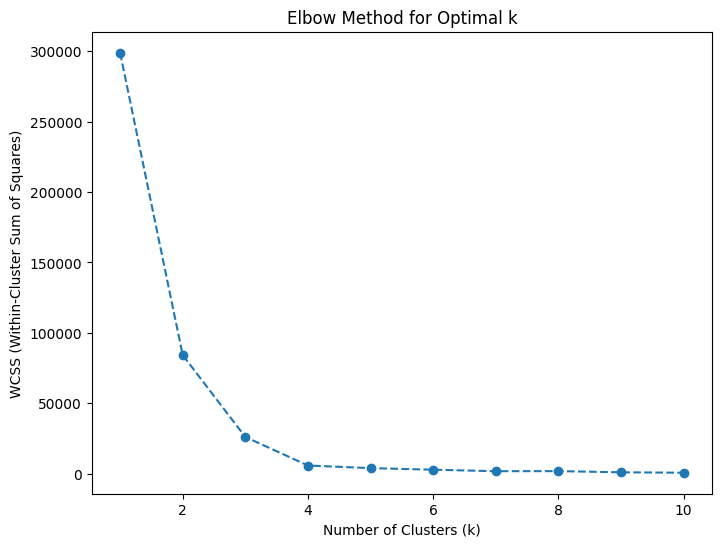

In [40]:
# Plot the Elbow method graph to choose optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


If the elbow is clear and easily identifiable, then the corresponding value of k at the elbow is a good choice for the number of clusters.
In some cases, the graph may not show a clear elbow. In such situations, you may need to make a subjective decision based on the trade-off between a smaller number of clusters (simpler model) and a larger number of clusters (more granularity but potentially overfitting).

# Interpretation of the Elbow Method Graph:

### Elbow Point:

Look for the point on the graph where the rate of decrease of WCSS sharply changes, forming an "elbow."
In your graph, it appears that the elbow is around k=3.

### Optimal k:

The optimal number of clusters is often chosen at the point where adding more clusters provides diminishing returns in terms of reducing the WCSS.
In this case, k=3 seems to be a reasonable choice for the number of clusters.

### Diminishing Returns:

Before the elbow point, adding more clusters significantly reduces the WCSS, indicating improved clustering performance.
After the elbow point, the reduction in WCSS is less pronounced, suggesting that additional clusters may not capture substantial additional structure in the data.

### Interpretation Caveats:

Keep in mind that the elbow method provides a heuristic, and the choice of k can be somewhat subjective.
The "elbow" may not always be well-defined, and different analysts may interpret the graph slightly differently.

### Domain Knowledge:

Consider any domain-specific knowledge about the data and the problem you are trying to solve.
Evaluate whether the suggested number of clusters aligns with your understanding of the underlying patterns in the data.

### Further Validation:

It's good practice to validate the chosen k using other techniques and domain-specific knowledge.
Experiment with different values of k to ensure robustness in the clustering results.

Based on the graph, k=3 seems to be a reasonable choice for the number of clusters, as it represents a balance between capturing meaningful patterns in the data and avoiding overcomplication.








In [41]:
# Save the DataFrame with cluster labels to a CSV file
df_cleaned.to_csv('clustered_data.csv', index=True)
